# K-Means 분류

## 1. 정보 불러오기

### 1.1 필요 패키지 불러오기

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### 1.2 정보 불러오기

In [3]:

# 엑셀 파일 경로 설정
file_path = "PokemonDB.xlsx"

# 엑셀 파일 불러오기
data = pd.read_excel(file_path)

# 데이터 확인
print(data.head())
data.info()


   #        Name Variation  Type1   Type2  Total  HP  Attack  Defense  \
0  1   Bulbasaur       NaN  Grass  Poison    318  45      49       49   
1  2     Ivysaur       NaN  Grass  Poison    405  60      62       63   
2  3    Venusaur       NaN  Grass  Poison    525  80      82       83   
3  4  Charmander       NaN   Fire     NaN    309  39      52       43   
4  5  Charmeleon       NaN   Fire     NaN    405  58      64       58   

   Sp. Atk  Sp. Def  Speed  
0       65       65     45  
1       80       80     60  
2      100      100     80  
3       60       50     65  
4       80       65     80  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   #          1138 non-null   int64 
 1   Name       1138 non-null   object
 2   Variation  167 non-null    object
 3   Type1      1138 non-null   object
 4   Type2      608 non-null    object
 5   To

## 2. 클러스터링

In [12]:
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# 특성 데이터 추출
X = data[features]

# K-means 클러스터링 모델 생성
kmeans = KMeans(n_clusters=3)  # 클러스터 개수를 3으로 설정한 예시입니다.

# 모델 학습
kmeans.fit(X)

# 클러스터 할당 결과 확인
labels = kmeans.labels_
data['Cluster'] = labels



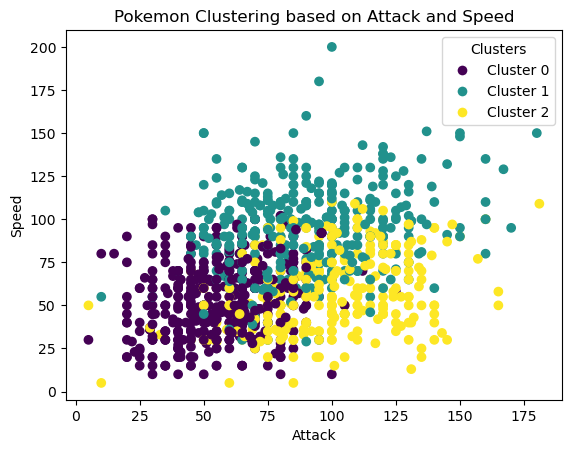

In [14]:
# 산점도 그리기
scatter = plt.scatter(data['Attack'], data['Speed'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Attack')
plt.ylabel('Speed')
plt.title('Pokemon Clustering based on Attack and Speed')

# 범례 추가
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) for label in range(3)]
legend_labels = ['Cluster ' + str(label) for label in range(3)]
plt.legend(legend_elements, legend_labels, title='Clusters')

plt.show()

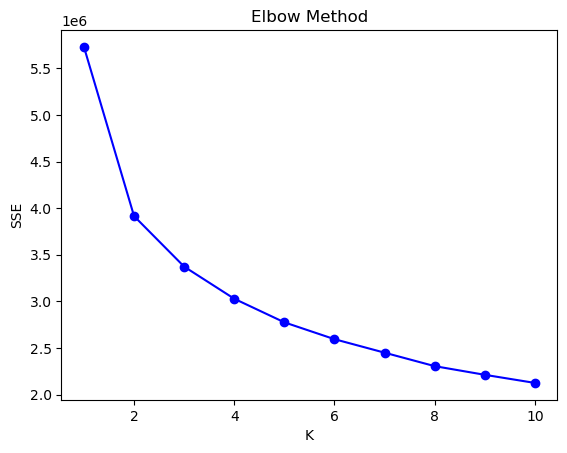

In [15]:
# K 값 범위 설정
k_values = range(1, 11)  # K 값 범위를 1부터 10까지 설정한 예시입니다.

# SSE(Sum of Squared Errors) 값을 저장할 리스트
sse = []

# 각 K 값에 대해 K-means 모델 생성 및 SSE 계산
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# SSE 그래프 그리기
plt.plot(k_values, sse, 'bo-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()